In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data-clust.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1545 non-null   float64
 1   y       1545 non-null   float64
dtypes: float64(2)
memory usage: 24.3 KB


,x,y
0,3.80286,2.15835
1,5.18384,2.21139
2,3.15722,2.30568
3,5.56977,2.37613
4,4.11252,2.95963


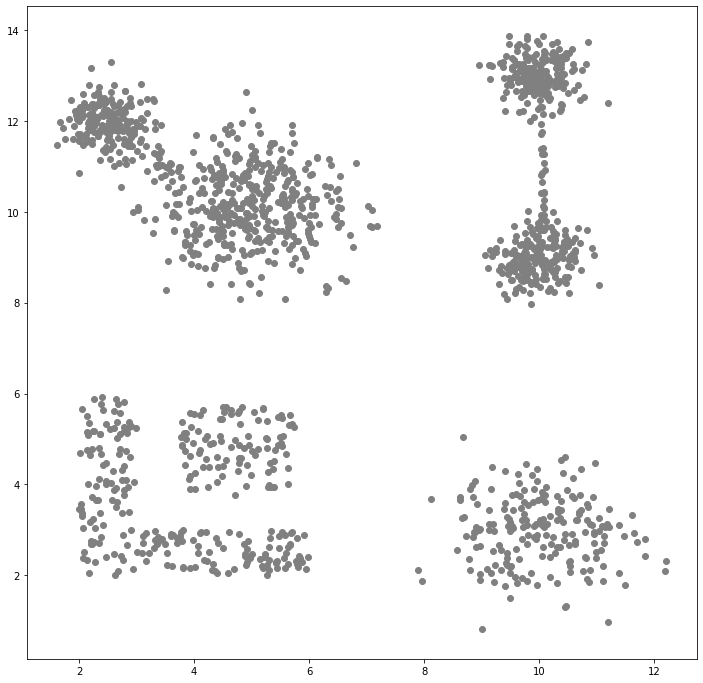

In [4]:
plt.rcParams["figure.figsize"] = (12,12)
plt.scatter(df['x'], df['y'], color="grey")

In [5]:
def euclidian_distance(y, x):
    dist = np.linalg.norm(np.array(y) - np.array(x))
    return round(dist, 4)

In [6]:
def centroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length


def KMEANS(dataset: np.array, k):
    past_centroids = []
    cluster_points = []
    clusters = {}
    
    num_instances, num_features = dataset.shape
    centroids = dataset[np.random.randint(0, num_instances - 1, size=k)]
    centroids = [tuple(p) for p in centroids]
    
    while True:
        # setting key for every cluster
        for c in range(k):
            clusters[c] = dict()        
            
        for index, point in enumerate(dataset):
            dist_vec = np.zeros((k,1))
            for i, centroid in enumerate(centroids):
                dist_vec[i] = euclidian_distance(centroid, point)
            # add points on nearest cluster --> np.argmin(dist_vec)
            clusters[np.argmin(dist_vec)][index] = tuple(point)
        
        past_centroids = centroids
        centroids = []
        
        for index, cluster in clusters.items():
            point_index = [i for i in cluster]
            points = [p for p in cluster.values()]
            new_centroid = centroidnp(np.array(points))
            centroids.append(new_centroid)

        if set(past_centroids) == set(centroids):
            break
            
    # plotting cluster        
    for index, cluster in clusters.items():
        points = [p for p in cluster.values()]
        plt.scatter(*zip(*points))
    plt.scatter(*zip(*centroids), marker="+", s=500, color='black')
    plt.title("KMEANS Clustering")
    plt.show()

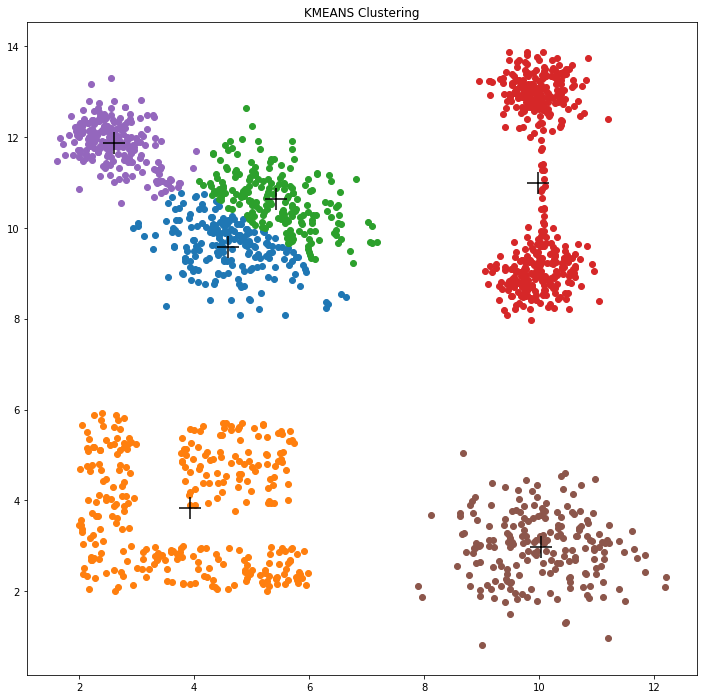

In [10]:
# data has to be a numpy array
data = df.to_numpy()
number_clusters = 6

KMEANS(data, number_clusters)

In [7]:
# using euclidian_distance
def single_link(ci, cj):
    return min(euclidian_distance(i, j) for i in ci for j in cj)


def find_index(matrix):
    min_dist = float('inf')
    x = y = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if i != j and matrix[i][j] < min_dist:
                min_dist, x, y = matrix[i][j], i, j
    return x, y, min_dist


def AGNES(dataset: np.array, dist, k):
    # initialize cluster and distance matrix
    cluster, distance_matrix = [], []
    
    # each sample in the dataset is considered as an initial cluster.
    for points in dataset:
        ci = []
        ci.append(tuple(points))
        cluster.append(ci)
        
    # calculating inter-cluster distances
    for i in cluster:
        mi = []
        for j in cluster:
            mi.append(dist(i, j))
        distance_matrix.append(mi)
        
    size = len(dataset)

    # Bottom-up convergence
    while size > k:
        # show some status
        if size % 100 == 0:
            print("~", size , "iterations to go")
        
        # find the nearest two clusters and merge them
        x, y, min_dist = find_index(distance_matrix)
        
        # extend the list, not append another list
        cluster[x].extend(cluster[y])
        
        # update Cluster
        cluster.remove(cluster[y])
        
        # re-calculate the distance between clusters
        distance_matrix = []
        for i in cluster:
            mi = []
            for j in cluster:
                mi.append(dist(i,j))
            distance_matrix.append(mi)
            
        size -= 1
        
    for c in cluster:
        points = [p for p in c]
        plt.scatter(*zip(*points))
    plt.title("AGNES Clustering")
    plt.show()


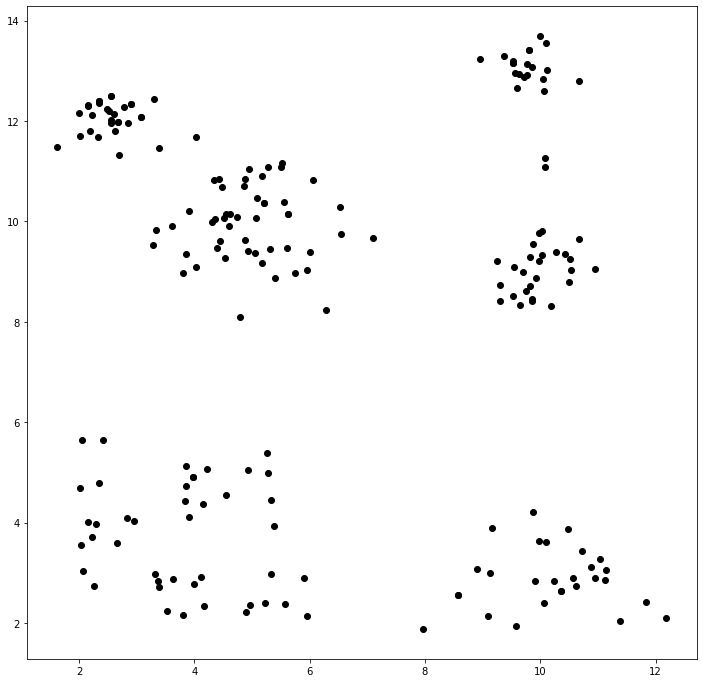

In [8]:
# prepare a smaller dataset for testing
size_test_data = 750
test_data = df.iloc[np.random.randint(0, len(df), size_test_data)]
test_data
# show test data
plt.scatter(test_data['x'], test_data['y'], color="black")

~ 200 iterations to go
~ 100 iterations to go


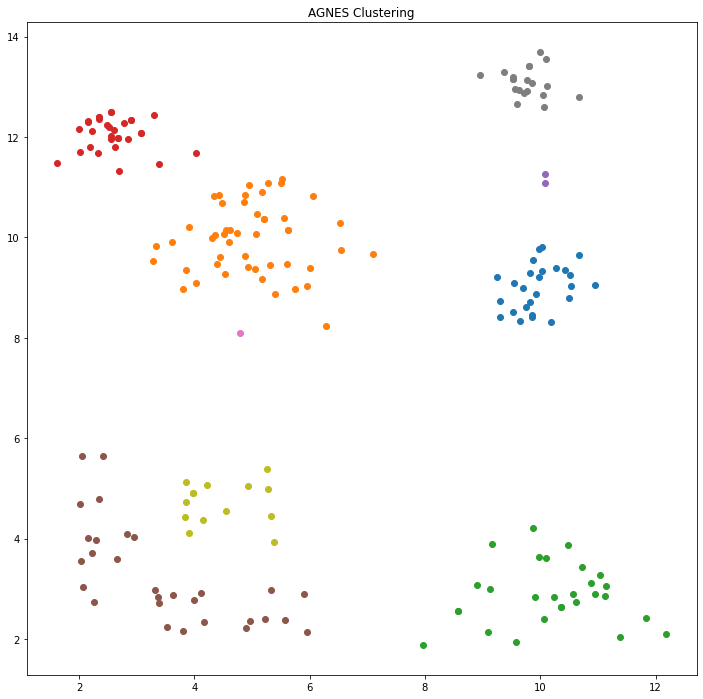

CPU times: user 1min 35s, sys: 606 ms, total: 1min 36s
Wall time: 1min 36s


In [9]:
%%time
# data has to be a numpy array
data = test_data.to_numpy()
number_of_clusters = 9
# with smaller test data
AGNES(data, single_link, number_of_clusters) # 200 samples --> 1min 34s

In [10]:
%%time
# data has to be a numpy array
data = df.to_numpy()
number_of_clusters = 6

AGNES(data, single_link, number_of_clusters) # ca. 5h

~ 1500 iterations to go


KeyboardInterrupt: 